In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [2]:
df = pd.read_excel('Практики совместного потребления модной одежды поколением Z_ аренда versus покупки (Ответы) — копия 3.xlsx')
df.drop(['Отметка времени'], axis=1, inplace=True)
#df = df[df['Ваш возраст (полных лет): '] < 36]                  

In [3]:
df.shape

(257, 41)

In [4]:
#df.isnull().any()

In [5]:
df_init_values = {}
c = 1
for col in df.columns:
    df_init_values[col] = list(df[col].unique())
    print(c, col, df[col].unique())
    c+=1
    print()

1 Ваш возраст (полных лет):  [21 20 19 25 22 24 18 23 27 26 17 29 30]

2 Ваш пол: ['Женский' 'Мужской']

3 Ваш тип занятости: ['Учусь' 'Учусь и работаю' 'Работаю' 'Не учусь и не работаю']

4 Обеспечиваете ли вы себя сами или вам помогают родители? ['Полностью обеспечивают родители'
 'Частично сам себя обеспечиваю, частично помогают родители'
 'Полностью сам себя обеспечиваю']

5 Какой суммой денег лично вы располагаете в месяц? ['31-40 тыс. руб.' '41-50 тыс. руб.' '61-80 тыс. руб.' '21-30 тыс. руб.'
 '121-150 тыс. руб.' 'Менее 20 тыс. руб.' 'Более 150 тыс. руб.'
 '51-60 тыс. руб.' '81-100 тыс. руб.' '101-120 тыс. руб.']

6 Выберите утверждение, которое лучше всего описывает материальное положение вашей семьи: ['Крупную бытовую технику можем позволить, но на покупку машины средств нет'
 'На обувь и одежду денег хватает, но на крупную бытовую технику уже нет'
 'На машину денег хватает, на покупку квартиры или дома денег нет'
 'Денег хватает на покупку дома или квартиры'
 'На еду средств 

In [6]:
df['Ваш возраст (полных лет): '].mean()

20.719844357976655

In [7]:
df['Ваш возраст (полных лет): '].median()

21.0

# Заменяем текстовые ответы на цифры

### С выбором одного ответа

In [8]:
df['Ваш пол:'].replace(['Мужской', 'Женский'], [1, 2], inplace=True)

df['Ваш тип занятости:'].replace(['Учусь', 'Учусь и работаю', 'Работаю',
                                  'Не учусь и не работаю'], [1, 2, 3, 4], inplace=True)

df['Обеспечиваете ли вы себя сами или вам помогают родители?'].replace(
    ['Полностью сам себя обеспечиваю', 
     'Частично сам себя обеспечиваю, частично помогают родители', 'Полностью обеспечивают родители'], 
    [1, 2, 3], inplace=True)

df['Какой суммой денег лично вы располагаете в месяц?'].replace(['Менее 20 тыс. руб.', '21-30 тыс. руб.', 
                                                                 '31-40 тыс. руб.', '41-50 тыс. руб.',
                                                                '51-60 тыс. руб.', '61-80 тыс. руб.',
                                                                '81-100 тыс. руб.', '101-120 тыс. руб.',
                                                                '121-150 тыс. руб.', 'Более 150 тыс. руб.'],
                                                                np.arange(1, 11), inplace=True)

df['Выберите утверждение, которое лучше всего описывает материальное положение вашей семьи:'].replace(
    ['Не хватает денег даже на еду', 'На еду средств хватает, но покупать одежду и обувь уже затруднительно',
     'На обувь и одежду денег хватает, но на крупную бытовую технику уже нет',
     'Крупную бытовую технику можем позволить, но на покупку машины средств нет',
     'На машину денег хватает, на покупку квартиры или дома денег нет',
     'Денег хватает на покупку дома или квартиры'],
     np.arange(1, 7), inplace=True)


df['Как часто вы пользуетесь сервисами проката модной одежды?'].replace(
    ['Очень часто', 'Часто', 'Иногда', 'Редко','Не пользовался никогда'],
     np.arange(1, 6), inplace=True)

df['Собираетесь ли вы в ближайший год воспользоваться сервисами проката модной одежды?'].replace(
    ['Точно воспользуюсь', 'Скорее воспользуюсь', 'Скорее не воспользуюсь', 
     'Точно не воспользуюсь',
     'Затрудняюсь ответить'],
     np.arange(1, 6), inplace=True)

df['Какая часть вашего окружения пользуется сервисами проката модной одежды?'].replace(
    ['Никто не пользуется', 'Малая часть моего окружения', 'Половина моего окружения', 
     'Большая часть моего окружения', 'Все люди из моего окружения', 'Затрудняюсь ответить'],
     np.arange(1, 7), inplace=True)


#df.head()

### Множественный выбор

In [9]:
df.rename(columns={'Какими сервисами совместного потребления вы когда-либо пользовались?':
                   'Сервисы'}, inplace=True)

df['Сервисы_Каршеринг'] = df['Сервисы'].str.contains('Каршеринг')
df['Сервисы_Байкшеринг_кикшеринг'] = df['Сервисы'].str.contains('Байкшеринг / кикшеринг')
df['Сервисы_Райдшеринг'] = df['Сервисы'].str.contains('Райдшеринг')
df['Сервисы_Аренда_жилья'] = df['Сервисы'].str.contains('Аренда жилья')
df['Сервисы_Фудшеринг'] = df['Сервисы'].str.contains('Фудшеринг')
df['Сервисы_Никакими'] = df['Сервисы'].str.contains('Никакими')

# другое: обмен одеждой с другим человеком на время??
df['Сервисы_Букшеринг'] = df['Сервисы'].str.contains('Букшеринг')
df['Сервисы_Аренда_самокатов'] = df['Сервисы'].str.contains('Аренда самокатов ')

for serv in ['Сервисы_Каршеринг', 'Сервисы_Байкшеринг_кикшеринг', 'Сервисы_Райдшеринг',
         'Сервисы_Аренда_жилья', 'Сервисы_Фудшеринг', 'Сервисы_Никакими', 'Сервисы_Букшеринг', 'Сервисы_Аренда_самокатов']:
    df[serv].replace([False, True], [0, 1], inplace=True)

df['Сервисы_Байкшеринг_кикшеринг'] = df['Сервисы_Байкшеринг_кикшеринг'] + df['Сервисы_Аренда_самокатов']

    
df.drop(['Сервисы'], axis=1, inplace=True)
df.drop(['Сервисы_Аренда_самокатов'], axis=1, inplace=True)


#df.head()

In [10]:
df.rename(columns={'В чем из перечисленного ниже вы участвуете (участвовали):':
                   'Экоучастие'}, inplace=True)

df['Экоучастие_1'] = df['Экоучастие'].str.contains('Подписываю петиции экологической направленности')
df['Экоучастие_2'] = df['Экоучастие'].str.contains('Выхожу на экологические протесты')
df['Экоучастие_3'] = df['Экоучастие'].str.contains('Покупаю экотовары по экологическим соображениям')
df['Экоучастие_4'] = df['Экоучастие'].str.contains('Перед покупкой товара изучаю, насколько производитель бережно относится к окружающей среде')
df['Экоучастие_5'] = df['Экоучастие'].str.contains('Участвую в раздельном сборе бытовых отходов')
df['Экоучастие_6'] = df['Экоучастие'].str.contains('Сдаю ненужную одежду на переработку')
df['Экоучастие_7'] = df['Экоучастие'].str.contains('Отдаю ненужные вещи нуждающимся')
df['Экоучастие_8'] = df['Экоучастие'].str.contains('Отказываюсь от одноразовых пакетов в магазине')
df['Экоучастие_9'] = df['Экоучастие'].str.contains('Отказываюсь от приобретения товаров, которые тестируются на животных')
df['Экоучастие_10'] = df['Экоучастие'].str.contains('Отказываюсь от приобретения изделий из натуральной кожи, от натуральных шуб, меховых изделий')
df['Экоучастие_11'] = df['Экоучастие'].str.contains('Ни в чем из перечисленного не участвую')

#другое
df['Экоучастие_12'] = df['Экоучастие'].str.contains('Покупаю одежду в секонд-хендах')
df['Экоучастие_13'] = df['Экоучастие'].str.contains('стараюсь не лить много воды')

df['Экоучастие_14'] = df['Экоучастие'].str.contains('Организую мероприятия на тему экологии')
df['Экоучастие_15'] = df['Экоучастие'].str.contains('Собираю макулатуру')


for eco in ['Экоучастие_1', 'Экоучастие_2', 'Экоучастие_3', 'Экоучастие_4', 'Экоучастие_5', 
             'Экоучастие_6', 'Экоучастие_7', 'Экоучастие_8', 'Экоучастие_9', 
             'Экоучастие_10', 'Экоучастие_11', 'Экоучастие_12', 'Экоучастие_13', 
            'Экоучастие_14', 'Экоучастие_15']:
    df[eco].replace([False, True], [0, 1], inplace=True)

df.drop(['Экоучастие'], axis=1, inplace=True)
#df.head()

In [11]:
df.rename(columns={'С какими из перечисленных ниже ситуаций ниже вы сталкивались при аренде модной одежды?':
                   'Негативный_опыт'}, inplace=True)

df['Негативный_опыт_1'] = df['Негативный_опыт'].str.contains('Одежда выглядела неновой, имела следы и дефекты использования')
df['Негативный_опыт_2'] = df['Негативный_опыт'].str.contains('Пришлось платить штраф за порчу одежды, хотя дефекты присутствовали до моего использования этой вещи')
df['Негативный_опыт_3'] = df['Негативный_опыт'].str.contains('После договоренности о встрече для передачи одежды в аренду, агент перестал выходить на связь')
df['Негативный_опыт_4'] = df['Негативный_опыт'].str.contains('После оплаты услуг проката одежды на онлайн-сервисе, одежда не была мне доставлена')
df['Негативный_опыт_5'] = df['Негативный_опыт'].str.contains('Не сталкивался ни с чем из перечисленного')
df['Негативный_опыт_6'] = df['Негативный_опыт'].str.contains('Никогда не пользовался арендой вещей')


for exp in ['Негативный_опыт_1', 'Негативный_опыт_2', 'Негативный_опыт_3', 
            'Негативный_опыт_4', 'Негативный_опыт_5', 'Негативный_опыт_6']:
    df[exp].replace([False, True], [0, 1], inplace=True)

df.drop(['Негативный_опыт'], axis=1, inplace=True)
#df.head()

In [12]:
df.rename(columns={'Что, по вашему мнению, нужно сделать чтобы молодежь начала активнее пользоваться арендой модной одежды?':
                   'Решения'}, inplace=True)

df['Решения'].fillna('noans', inplace=True)

df['Решения_1'] = df['Решения'].str.contains('Больше информировать потребителей о существующих сервисах аренды модной одежды')
df['Решения_2'] = df['Решения'].str.contains('Развивать сервисы аренды: делать их более понятными и удобными в использовании')
df['Решения_3'] = df['Решения'].str.contains('Обеспечивать гигиеничность проката одежды и информировать пользователей об этом')
df['Решения_4'] = df['Решения'].str.contains('Увеличивать ассортимент модных товаров на платформах аренды')
df['Решения_5'] = df['Решения'].str.contains('Увеличивать количество уникальных товаров на платформах аренды')
df['Решения_6'] = df['Решения'].str.contains('Больше информировать потребителей о важности устойчивого потребления')


df['Решения_7'] = df['Решения'].str.contains('Уменьшить количество денег у населения')
df['Решения_8'] = df['Решения'].str.contains('Больше говорить об этом, как об экологичном способе.')
df['Решения_9'] = df['Решения'].str.contains('Вещи должны быть качественными.')
df['Решения_10'] = df['Решения'].str.contains('Контролировать обращение людей с вещью.')
df['Решения_11'] = df['Решения'].str.contains('Информировать о плюсах, так как пока абсолютно не ясны преимущества аренды' or 'Рассказывать о преимуществах аренды по сравнению с покупкой новой одежды') 

for sol in ['Решения_1', 'Решения_2', 'Решения_3', 
            'Решения_4', 'Решения_5', 'Решения_6',
           'Решения_7', 'Решения_8', 'Решения_9','Решения_10', 'Решения_11']:
    df[sol].replace([False, True], [0, 1], inplace=True)

df.drop(['Решения'], axis=1, inplace=True)
#df.head()

### С выбором из 5 вариантов

In [13]:
#df.columns[8:38]

In [14]:
ans = ['Абсолютно согласен', 'Скорее согласен', 'Скорее не согласен', 
     'Абсолютно не согласен', 'Затрудняюсь ответить', 'Не слежу за модой']

for ques in df.columns[8:38].values:
    df[ques].replace(ans, [1, 2, 3, 4, 5, 5], inplace=True)

In [15]:
df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [16]:
df.columns

c=1
for col in df.columns:
    print(c, col)
    c+=1

1 Ваш возраст (полных лет): 
2 Ваш пол:
3 Ваш тип занятости:
4 Обеспечиваете ли вы себя сами или вам помогают родители?
5 Какой суммой денег лично вы располагаете в месяц?
6 Выберите утверждение, которое лучше всего описывает материальное положение вашей семьи:
7 Как часто вы пользуетесь сервисами проката модной одежды?
8 Собираетесь ли вы в ближайший год воспользоваться сервисами проката модной одежды?
9 В какой степени вы согласны или не согласны со следующими суждениями? [Я предпочитаю покупать НОВУЮ модную одежду]
10 В какой степени вы согласны или не согласны со следующими суждениями? [Я предпочитаю покупать модную одежду в секонд-хендах]
11 В какой степени вы согласны или не согласны со следующими суждениями? [Я предпочитаю покупать модную одежду на сервисах перепродажи]
12 В какой степени вы согласны или не согласны со следующими суждениями? [Я предпочитаю брать модную одежду напрокат]
13 В какой степени вы согласны или не согласны со следующими суждениями? [Я считаю, что в секо

In [17]:
# заменяем названия колонок на их номера
df.columns = [i for i in range(1, 77)]

# Формируем зависимые переменные

In [18]:
'''создаем игрек для 1 регрессии (выбор в пользу аренды) из 3 вопросов:
7 Как часто вы пользуетесь сервисами проката модной одежды? (оч часто, часто, иногда, редко = 1, никогда = 0)
8 Собираетесь ли вы в ближайший год воспользоваться сервисами проката модной одежды? (точно и скорее воспользуюсь = 1, остальное = 0)
12 В какой степени вы согласны или не согласны со следующими суждениями? [Я предпочитаю брать модную одежду напрокат]
(абсолютно и скорее согласен = 1, остальное = 0)
'''

df['new_7'] = df[7].replace([1,2,3,4,5], [1,1,1,1,0])
df['new_8'] = df[8].replace([1,2,3,4,5], [1,1,0,0,0])
df['new_12'] = df[12].replace([1,2,3,4,5], [1,1,0,0,0])

df['y_rent'] = df[['new_7','new_8','new_12']].sum(axis=1)
df['y_rent']

0      3
1      0
2      0
3      0
4      0
      ..
252    0
253    0
254    0
255    0
256    2
Name: y_rent, Length: 257, dtype: int64

In [19]:
df['y_rent'].replace([0, 1, 2, 3], [0, 1, 1, 1], inplace=True)
df['y_rent'].unique()

array([1, 0])

In [20]:
df.drop(columns={'new_7', 'new_8', 'new_12'}, inplace=True)

In [21]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,y_rent
0,21,2,1,3,3,4,3,2,1,1,...,1,1,1,1,0,0,0,0,0,1
1,21,2,2,2,4,3,5,3,1,4,...,1,1,1,1,0,0,0,0,0,0
2,20,2,2,1,6,4,5,4,2,4,...,1,0,0,1,0,0,0,0,0,0
3,19,2,1,3,2,5,5,3,2,3,...,1,0,1,0,0,0,0,0,0,0
4,25,2,2,3,2,3,5,4,1,4,...,1,0,1,1,0,0,0,0,0,0


In [22]:
df['y_rent'].sum() / len(df['y_rent'])

0.11673151750972763

In [23]:
df['y_rent'].sum()
#прокат

30

In [24]:
''' создаем игрек для 2 регрессии (секонд-хенд)
10 В какой степени вы согласны или не согласны со следующими суждениями? 
[Я предпочитаю покупать модную одежду в секонд-хендах]
'''

df['y_second'] = df[10].replace([1,2,3,4,5], [1,1,0,0,0])
df['y_second']


0      1
1      0
2      0
3      0
4      0
      ..
252    0
253    0
254    0
255    1
256    1
Name: y_second, Length: 257, dtype: int64

In [25]:
df['y_second'].sum() / len(df['y_second'])

0.2490272373540856

In [26]:
df['y_second'].sum()

64

In [27]:
''' 3 игрек: либо прокат либо аренда
как минимум одна единичка (либо для проката либо для секонда)
предпочитает прокат и / или секонд
'''

df['y_rent_second'] = df[['y_rent','y_second']].sum(axis=1)
df['y_rent_second'].replace([0, 1, 2], [0, 1, 1], inplace=True)
df['y_rent_second']

0      1
1      0
2      0
3      0
4      0
      ..
252    0
253    0
254    0
255    1
256    1
Name: y_rent_second, Length: 257, dtype: int64

In [28]:
df['y_rent_second'].sum() / len(df['y_rent_second'])

0.3035019455252918

In [29]:
df['y_rent_second'].sum()

78

In [30]:
df.to_csv('prepared_data.csv', index=False)
# выгружаем массив, с которым работаем далее в Stata

# Дескриптивный анализ

In [31]:
# представлен в Stata, здесь для проверки

In [32]:
pd.DataFrame().to_excel("tab.xlsx", sheet_name='sheet 0')

In [33]:
# аналогично tab в Stata

# таблички с частотами и процентами по каждой переменной
for col in df.columns:
    value, counts = np.unique(df[col], return_counts=True) 
    percent = [round(list(counts)[i] / sum(counts) * 100, 2) for i in range(len(counts))]

    d = {col: list(value), 'Частота': list(counts), 'Процент': percent}
    tab1 = pd.DataFrame(d)
    print(tab1)
    print()
    
    with pd.ExcelWriter("tab.xlsx", mode="a") as writer:
        tab1.to_excel(writer, sheet_name=str(col), index=False)


     1  Частота  Процент
0   17        3     1.17
1   18       22     8.56
2   19       31    12.06
3   20       71    27.63
4   21       68    26.46
5   22       31    12.06
6   23       11     4.28
7   24       11     4.28
8   25        2     0.78
9   26        2     0.78
10  27        3     1.17
11  29        1     0.39
12  30        1     0.39

   2  Частота  Процент
0  1       71    27.63
1  2      186    72.37

   3  Частота  Процент
0  1      113    43.97
1  2      125    48.64
2  3       18     7.00
3  4        1     0.39

   4  Частота  Процент
0  1       63    24.51
1  2      108    42.02
2  3       86    33.46

    5  Частота  Процент
0   1       53    20.62
1   2       59    22.96
2   3       31    12.06
3   4       12     4.67
4   5       21     8.17
5   6       27    10.51
6   7       25     9.73
7   8       11     4.28
8   9        8     3.11
9  10       10     3.89

   6  Частота  Процент
0  1        1     0.39
1  2       14     5.45
2  3       51    19.84
3  4      103

   75  Частота  Процент
0   0      256    99.61
1   1        1     0.39

   76  Частота  Процент
0   0      256    99.61
1   1        1     0.39

   y_rent  Частота  Процент
0       0      227    88.33
1       1       30    11.67

   y_second  Частота  Процент
0         0      193     75.1
1         1       64     24.9

   y_rent_second  Частота  Процент
0              0      179    69.65
1              1       78    30.35



In [34]:
# описательные статистики
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,y_rent,y_second,y_rent_second
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,...,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,20.719844,1.723735,1.638132,2.089494,3.945525,4.140078,4.828794,3.743191,1.731518,3.171206,...,0.396887,0.474708,0.003891,0.003891,0.003891,0.003891,0.003891,0.116732,0.249027,0.303502
std,1.905818,0.448022,0.629193,0.757622,2.676020,1.062421,0.594463,0.826917,0.915310,1.031661,...,0.490207,0.500334,0.062378,0.062378,0.062378,0.062378,0.062378,0.321727,0.433293,0.460667
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,1.000000,2.000000,2.000000,3.000000,5.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,2.000000,2.000000,2.000000,3.000000,4.000000,5.000000,4.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,2.000000,2.000000,3.000000,6.000000,5.000000,5.000000,4.000000,2.000000,4.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,30.000000,2.000000,4.000000,3.000000,10.000000,6.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
with pd.ExcelWriter("tab.xlsx", mode="a") as writer:
    df.describe().to_excel(writer, sheet_name='describe')

## Избавление от / объединение похожих вопросов

1 регрессия
15 16 17 22 25 26+27 28+29 45-59 60-65 33 35 37 4/5/6 38-44

- фактор ПРИВЕРЖЕННОСТИ МОДЕ 15
Я неукоснительно следую моде, слежу за всеми трендами и пытаюсь постоянно обновлять свой гардероб 

- ЗАВИСИТ ЛИ МОДНОСТЬ ОТ СПОСОБОВ ПОТРЕБЛЕНИЯ: 16
Можно одеваться по моде, независимо от того, покупаешь вещь или берешь ее напрокат

- цена 17 (или 21?)
Если брать вещи напрокат, то легче / дешевле одеваться модно

- уникальность 22
Для меня важно, чтобы одежда, которую я ношу, была уникальной

- окружение 25 //  ПОВЕДЕНИЕ ОКРУЖЕНИЯ 
Какая часть вашего окружения пользуется сервисами проката модной одежды?

- ценности? 26 27 объед?????????  ПОДВЕРЖЕННОСТЬ ОБЩЕСТВЕННОМУ МНЕНИЮ / СКЛОННОСТЬ ПОДЧИНЯТЬСЯ МНЕНИЮ ДРУГИХ
// 26 ПОТРЕБНОСТЬ БЫТЬ ЧАСТЬЮ ДВИЖЕНИЯ:
Аренда модной одежды позволяет почувствовать себя частью популярного движения по совместному ответственному потреблению
// 27 ПОДВЕРЖЕННОСТЬ МНЕНИЮ ОКРУЖЕНИЯ:
Мнение и опыт моего окружения относительно проката модной одежды являются важными для меня при принятии решения относительно ее аренды 

- ПРОЭКОЛОГИЧЕСКИЕ ЦЕННОСТИ (УСТАНОВКИ) В ОТНОШЕНИИ ПОТРЕБЛЕНИЯ 28 + 29
Я веду экологичный образ жизни (сортирую мусор, пользуюсь вещами из перерабатываемых материалов и т.д.), так как верю, что смогу ослабить экологические проблемы
Беря напрокат или покупая в секонд-хендах модные вещи, каждый человек может внести вклад в ослабление экологических проблем

 - проэкологичное поведение 45-59 кроме 55 это ни в чем
В чем из перечисленного ниже вы участвуете (участвовали):

-  отрицательный опыт 60-65

- доверие 33
Я не доверяю онлайн-сервисам аренды модной одежды

- гигиеничность 35
Я не могу носить те вещи, которые носили до меня, так как считаю это негигиеничным

- страх испортить 37
Аренда модной одежды не дает возможности полноценно использовать вещь из-за страха ее испортить

- материальный статус 5 (либо 4, 6)
Какой суммой денег лично вы располагаете в месяц?

- включенность в ЭСП? 38-44 кроме 43(никакими)
Какими сервисами совместного потребления вы когда-либо пользовались?

--------------
2 регрессия
15 16 20 22 28+29 45-49 34 35 4/5/6 38-44
//минус 17 25 26+27 60-65 33 37
//плюс 20 34

//новое
!!!!цена 20
!!!!доверие 34
//

- фактор ПРИВЕРЖЕННОСТИ МОДЕ 15
Я неукоснительно следую моде, слежу за всеми трендами и пытаюсь постоянно обновлять свой гардероб корр с игрек больше

- ЗАВИСИТ ЛИ МОДНОСТЬ ОТ СПОСОБОВ ПОТРЕБЛЕНИЯ: 16
Можно одеваться по моде, независимо от того, покупаешь вещь или берешь ее напрокат

- !!!!цена 20
Покупка поддержанных модных вещей позволяет сэкономить деньги по сравнению с покупкой новых

- уникальность 22
Для меня важно, чтобы одежда, которую я ношу, была уникальной


- ПРОЭКОЛОГИЧЕСКИЕ ЦЕННОСТИ (УСТАНОВКИ) В ОТНОШЕНИИ ПОТРЕБЛЕНИЯ 28 + 29
Я веду экологичный образ жизни (сортирую мусор, пользуюсь вещами из перерабатываемых материалов и т.д.), так как верю, что смогу ослабить экологические проблемы
Беря напрокат или покупая в секонд-хендах модные вещи, каждый человек может внести вклад в ослабление экологических проблем


 - проэкологичное поведение 45-59 кроме 55 это ни в чем
В чем из перечисленного ниже вы участвуете (участвовали):


- !!!!доверие 34
Я не доверяю сервисам перепродажи б/у модной одежды

- гигиеничность 35
Я не могу носить те вещи, которые носили до меня, так как считаю это негигиеничным

- материальный статус 4 5 6 либо
Какой суммой денег лично вы располагаете в месяц?


- включенность в ЭСП? 38-44
Какими сервисами совместного потребления вы когда-либо пользовались?


---------------
3 регр (прокат / секонд)

//
мб 25 тоже хоть там про пользование окружением проката
26+27 про аренду
отриц опыт 60-65 ток про аренду
37 страх испортить ток про аренду


- фактор ПРИВЕРЖЕННОСТИ МОДЕ 15
Я неукоснительно следую моде, слежу за всеми трендами и пытаюсь постоянно обновлять свой гардероб корр с игрек больше

- ЗАВИСИТ ЛИ МОДНОСТЬ ОТ СПОСОБОВ ПОТРЕБЛЕНИЯ: 16
Можно одеваться по моде, независимо от того, покупаешь вещь или берешь ее напрокат

- уникальность 22
Для меня важно, чтобы одежда, которую я ношу, была уникальной

- ПРОЭКОЛОГИЧЕСКИЕ ЦЕННОСТИ (УСТАНОВКИ) В ОТНОШЕНИИ ПОТРЕБЛЕНИЯ 28 + 29
Я веду экологичный образ жизни (сортирую мусор, пользуюсь вещами из перерабатываемых материалов и т.д.), так как верю, что смогу ослабить экологические проблемы
Беря напрокат или покупая в секонд-хендах модные вещи, каждый человек может внести вклад в ослабление экологических проблем

 - проэкологичное поведение 45-59 кроме 55 это ни в чем
В чем из перечисленного ниже вы участвуете (участвовали):

- гигиеничность 35
Я не могу носить те вещи, которые носили до меня, так как считаю это негигиеничным

- материальный статус 4 5 6 либо
Какой суммой денег лично вы располагаете в месяц?

- включенность в ЭСП? 38-44
Какими сервисами совместного потребления вы когда-либо пользовались?

- доверие 33+34
Я не доверяю онлайн-сервисам аренды модной одежды
Я не доверяю сервисам перепродажи б/у модной одежды

- цена 17+20
Если брать вещи напрокат, то легче / дешевле одеваться модно
Покупка поддержанных модных вещей позволяет сэкономить деньги по сравнению с покупкой новых



## Посмотрим на распределение уровня включенности в экоповедение и в ЭСП

In [36]:
eco_behavior = df[[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59]].sum(axis=1) 
eco_behavior.describe()

count    257.000000
mean       3.151751
std        2.269948
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       10.000000
dtype: float64

In [37]:
val, coun = np.unique(eco_behavior,return_counts=True)
for v, c in zip(val, coun):
    print(v, ':', round(c/257*100,2))

0 : 12.84
1 : 14.01
2 : 15.56
3 : 19.84
4 : 10.51
5 : 10.89
6 : 6.23
7 : 5.84
8 : 3.11
9 : 0.78
10 : 0.39


'\n0 база\n1 почти не выраженное эко поведение\n2 слабо выраженное\n3 средне выраженное\n4+\n\n4-5 сильно выраженное\n6+ очень выраженное\n'

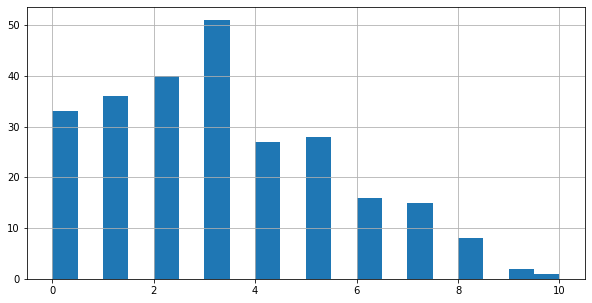

In [38]:
eco_behavior.hist(figsize=(10,5),bins=20);

'''
0 база
1 почти не выраженное эко поведение
2 слабо выраженное
3 средне выраженное
4+

4-5 сильно выраженное
6+ очень выраженное
'''

In [39]:
vkl = df[[38, 39, 40, 41, 42, 44]].sum(axis=1) 
vkl.describe()

count    257.000000
mean       1.245136
std        1.144887
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
dtype: float64

In [40]:
val, c = np.unique(vkl,return_counts=True)
c/257*100

array([33.85214008, 26.84824903, 22.95719844, 14.0077821 ,  1.94552529,
        0.38910506])

'\n0\n1\n2\n3456'

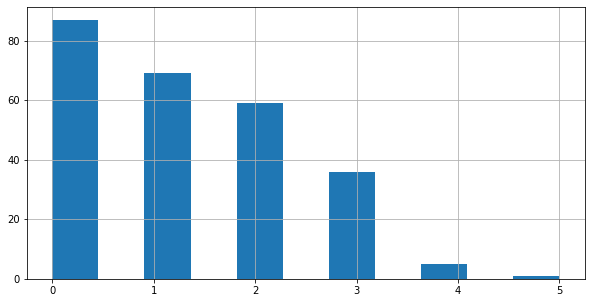

In [41]:
vkl.hist(figsize=(10,5), bins=11);

'''
0
1
2
3456'''

In [42]:
prep_df = df.copy()

In [43]:
#prep_df['y_rent'] = df['y_rent']
#prep_df['y_second'] = df['y_second']
#prep_df['y_rent_second'] = df['y_rent_second']


# переменные для 1 регрессии
prep_df['FF'] = df[15].replace([1,2,3,4,5], [1,1,0,0,0]) #приверженность моде //following the fashion
prep_df['CM'] = df[16].replace([1,2,3,4,5], [1,0,0,0,0]) #зависит ли модность от способов потребления //consumption methods
prep_df['PR_R'] = df[17].replace([1,2,3,4,5], [1,1,0,0,0]) # цена //price
prep_df['NU'] = df[22].replace([1,2,3,4,5], [1,1,0,0,0]) # уникальность //need for uniqueness
prep_df['EB'] = df[25].replace([1,2,3,4,5,6], [1,0,0,0,0,1]) # поведение окружения //environment behavior


prep_df['new_26'] = df[26].replace([1,2,3,4,5], [1,1,0,0,0]) 
prep_df['new_27'] = df[27].replace([1,2,3,4,5], [1,1,0,0,0]) 
prep_df['PO'] = prep_df[['new_26','new_27']].sum(axis=1)
prep_df['PO'].replace([0, 1, 2], [0, 1, 1], inplace=True) # подверженность мнению других //Exposure to public opinion

prep_df.drop(columns={'new_26', 'new_27'}, inplace=True)


prep_df['new_28'] = df[28].replace([1,2,3,4,5], [1,0,0,0,0]) ##??
prep_df['new_29'] = df[29].replace([1,2,3,4,5], [1,0,0,0,0]) ##??
prep_df['PEA'] = prep_df[['new_28','new_29']].sum(axis=1)
prep_df['PEA'].replace([0, 1, 2], [0, 1, 1], inplace=True) #проэкологические установки в отношении потребления //pro-ecological attitudes towards consumption

prep_df.drop(columns={'new_28', 'new_29'}, inplace=True)

prep_df['PEB'] = df[[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59]].sum(axis=1) #проэкологическое поведение //pro-environmental behavior
prep_df['PEB'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], inplace=True)
#база 0

#отрицательный опыт
prep_df['NE'] = df.loc[:,60:63].sum(axis=1)
prep_df['NE'].replace([0, 1, 2, 3, 4], [0, 1, 1, 1, 1], inplace=True)  # был отриц опыт //negative experience

#prep_df['new_64_65'] = df.loc[:,64:65].sum(axis=1) #не сталк/не польз
#prep_df['new_64_65'].replace([0, 1, 2], [0, 1, 1], inplace=True)  

#prep_df['new_60_65'] = df_reg1['new_60_63'] - df['new_64_65']
#prep_df['new_60_65'].replace([-1, 0, 1], [0, 0, 1])  #собираем в проэкологическое поведение


prep_df['TR_R'] = df[33].replace([1,2,3,4,5], [1,1,0,0,0]) #доверие //trust

prep_df['HY'] = df[35].replace([1,2,3,4,5], [1,1,0,0,0]) #гигиеничность //hygiene

#prep_df['new_36'] = df[36].replace([1,2,3,4,5], [1,0,0,0,0]) #гигиеничность

prep_df['FS'] = df[37].replace([1,2,3,4,5], [1,0,0,0,0]) #страх испортить //fear of spoiling


#материальный статус //material status
prep_df['MS'] = df[5].replace([1,2,3,4,5,6,7,8,9,10], [1,2,3,3,4,4,5,5,5,5]) #располагаемые средства

#включенность в ЭСП //involvement in ESP
prep_df['IN'] = df[[38, 39, 40, 41, 42, 44]].sum(axis=1) 
prep_df['IN'].replace([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 3, 3, 3], inplace=True)

# для второй регрессии

prep_df['PR_S'] = df[20].replace([1,2,3,4,5], [1,0,0,0,0]) # цена
prep_df['TR_S'] = df[34].replace([1,2,3,4,5], [1,1,0,0,0]) # доверие

# для третьей

prep_df['TR'] = prep_df[['TR_S', 'TR_R']].sum(axis=1) # доверие
prep_df['TR'].replace([0, 1, 2], [0, 0, 1], inplace=True)  # не доверяют ни сервисам аренды, ни перепродажи

prep_df['PR'] = prep_df[['PR_R', 'PR_S']].sum(axis=1).replace([0, 1, 2], [0, 1, 1]) #цена


In [44]:
prep_df.to_excel('prep_df.xlsx', index=False)

## Парные корреляции

In [45]:
reg1_x = ['FF','CM','PR_R','NU','EB','PO','PEA','PEB','NE','TR_R','HY','FS','MS','IN']

In [46]:
print(*reg1_x)

FF CM PR_R NU EB PO PEA PEB NE TR_R HY FS MS IN


In [47]:
x_1 = prep_df[reg1_x]

In [48]:
pwcorr_x1 = x_1.corr().round(2)
pwcorr_x1.to_excel('pwcorr_x1.xlsx')
pwcorr_x1

,FF,CM,PR_R,NU,EB,PO,PEA,PEB,NE,TR_R,HY,FS,MS,IN
FF,1.00,0.07,0.11,0.24,-0.19,0.18,0.06,0.10,0.16,0.08,0.13,0.05,0.13,-0.00
CM,0.07,1.00,0.15,0.08,-0.11,0.23,0.26,0.15,0.16,-0.03,-0.21,0.10,0.00,0.13
PR_R,0.11,0.15,1.00,0.01,-0.21,0.20,0.11,0.01,0.10,-0.04,-0.01,-0.04,0.06,0.04
NU,0.24,0.08,0.01,1.00,-0.18,0.09,0.07,0.10,0.12,0.09,-0.01,0.06,0.12,0.13
EB,-0.19,-0.11,-0.21,-0.18,1.00,-0.17,-0.07,-0.15,-0.40,-0.09,0.01,0.08,-0.13,-0.13
PO,0.18,0.23,0.20,0.09,-0.17,1.00,0.20,0.13,0.07,-0.01,-0.18,0.08,-0.10,0.04
PEA,0.06,0.26,0.11,0.07,-0.07,0.20,1.00,0.34,0.14,0.02,-0.19,0.02,-0.05,0.03
PEB,0.10,0.15,0.01,0.10,-0.15,0.13,0.34,1.00,0.09,-0.09,-0.10,-0.08,-0.04,0.09
NE,0.16,0.16,0.10,0.12,-0.40,0.07,0.14,0.09,1.00,0.06,-0.17,-0.07,0.14,0.20
TR_R,0.08,-0.03,-0.04,0.09,-0.09,-0.01,0.02,-0.09,0.06,1.00,0.16,0.16,0.10,-0.11


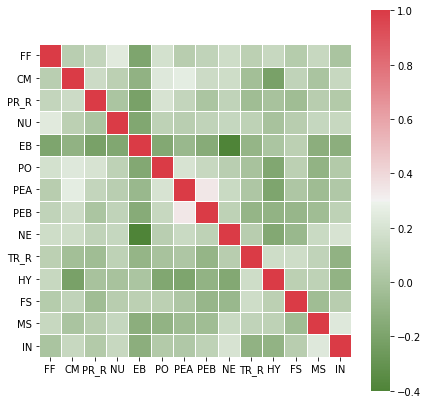

In [49]:
plt.figure(figsize=(7,7))
sns.heatmap(pwcorr_x1,linewidths=.5, cmap=sns.diverging_palette(120,10, as_cmap=True), square=True);

In [50]:
corr_matr_x1 = pd.DataFrame(pwcorr_x1) #матрица корреляций в виде дф


In [51]:
# попарные корреляции по убыванию
df_corr_x1 = corr_matr_x1.abs().unstack().sort_values(kind="quicksort", ascending=False)
df_corr_x1 = df_corr_x1[df_corr_x1 < 1].drop_duplicates()
df_corr_x1[df_corr_x1 > 0.3]

NE   EB     0.40
PEB  PEA    0.34
dtype: float64

## Корреляция с игреком

In [52]:
y_x1 = reg1_x.copy()
y_x1.append('y_rent')

In [53]:
#y_x1

In [54]:
corr_y_x1 = prep_df[y_x1].corr()[['y_rent']]
corr_y_x1

,y_rent
FF,0.239195
CM,0.107697
PR_R,0.226486
NU,0.152516
EB,-0.392269
PO,0.181266
PEA,0.208999
PEB,0.087188
NE,0.478082
TR_R,-0.020122


In [55]:
# Низкая корреляция с игреком:
low_corr_rent = (corr_y_x1['y_rent'][abs(corr_y_x1['y_rent']) < 0.1]).index.to_list()
low_corr_rent

['PEB', 'TR_R', 'FS']

# Аналогично для 2 регрессии

## Парные корреляции

In [56]:
reg2_x  = ['FF', 'CM', 'PR_S', 'NU', 'EB', 'PO', 'PEA', 'PEB', 'NE', 'TR_S', 'HY', 'FS', 'MS', 'IN']

In [57]:
x_2 = prep_df[reg2_x]
y_x2 = reg2_x.copy()
y_x2.append('y_second')


In [58]:
pwcorr_x2 = x_2.corr()
pwcorr_x2.to_excel('pwcorr_x2.xlsx', index=False)
pwcorr_x2

,FF,CM,PR_S,NU,EB,PO,PEA,PEB,NE,TR_S,HY,FS,MS,IN
FF,1.000000,0.068392,0.021611,0.242296,-0.187669,0.176180,0.057059,0.101861,0.163811,0.123972,0.129786,0.049059,0.133096,-0.002956
CM,0.068392,1.000000,0.350633,0.079474,-0.108657,0.233719,0.264715,0.146226,0.160309,-0.053122,-0.213779,0.100442,0.001248,0.126978
PR_S,0.021611,0.350633,1.000000,-0.010099,-0.021767,0.140146,0.443756,0.069842,0.087283,-0.070042,-0.261281,0.084624,-0.069844,0.000953
NU,0.242296,0.079474,-0.010099,1.000000,-0.180354,0.090248,0.072947,0.102640,0.121050,0.063341,-0.009974,0.055042,0.115548,0.133201
EB,-0.187669,-0.108657,-0.021767,-0.180354,1.000000,-0.174787,-0.067882,-0.146485,-0.397450,-0.120989,0.012190,0.083181,-0.130120,-0.127800
PO,0.176180,0.233719,0.140146,0.090248,-0.174787,1.000000,0.196032,0.130433,0.074315,0.025386,-0.179059,0.081894,-0.099023,0.036069
PEA,0.057059,0.264715,0.443756,0.072947,-0.067882,0.196032,1.000000,0.343164,0.143131,-0.022378,-0.186570,0.017745,-0.045330,0.028340
PEB,0.101861,0.146226,0.069842,0.102640,-0.146485,0.130433,0.343164,1.000000,0.088675,-0.149045,-0.103077,-0.076963,-0.037647,0.089832
NE,0.163811,0.160309,0.087283,0.121050,-0.397450,0.074315,0.143131,0.088675,1.000000,0.038827,-0.172351,-0.072879,0.144129,0.195000
TR_S,0.123972,-0.053122,-0.070042,0.063341,-0.120989,0.025386,-0.022378,-0.149045,0.038827,1.000000,0.237226,0.132602,0.131941,-0.140114


In [59]:
corr_matr_x2 = pd.DataFrame(pwcorr_x2) #матрица корреляций в виде дф

# попарные корреляции по убыванию
df_corr_x2 = corr_matr_x2.abs().unstack().sort_values(kind="quicksort", ascending=False)
df_corr_x2 = df_corr_x2[df_corr_x2 < 1].drop_duplicates()
df_corr_x2[df_corr_x2 > 0.3]

PR_S  PEA     0.443756
NE    EB      0.397450
CM    PR_S    0.350633
PEB   PEA     0.343164
dtype: float64

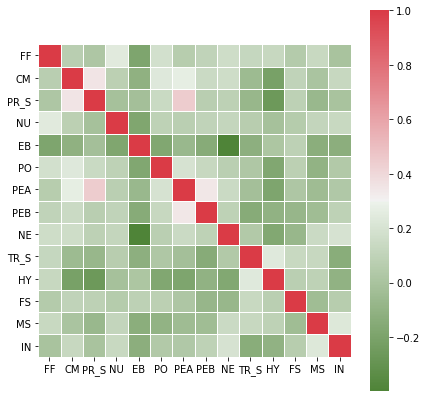

In [60]:
plt.figure(figsize=(7,7))
sns.heatmap(pwcorr_x2,linewidths=.5, cmap=sns.diverging_palette(120,10, as_cmap=True), square=True);

In [61]:
corr_y_x2 = prep_df[y_x2].corr()[['y_second']]
# Низкая корреляция с игреком:
low_corr_second = (corr_y_x2['y_second'][abs(corr_y_x2['y_second']) < 0.1]).index.to_list()
low_corr_second

['TR_S', 'FS', 'MS', 'IN']

# Третья регрессия

In [62]:
reg3_x = ['FF', 'CM', 'PR', 'NU', 'EB', 'PO', 'PEA','PEB','NE','TR','HY','FS','MS','IN']


In [63]:
y_x3 = reg3_x.copy()
y_x3.append('y_rent_second')
y_x3

['FF',
 'CM',
 'PR',
 'NU',
 'EB',
 'PO',
 'PEA',
 'PEB',
 'NE',
 'TR',
 'HY',
 'FS',
 'MS',
 'IN',
 'y_rent_second']

In [64]:
x_3 = prep_df[reg3_x]

In [65]:
pwcorr_x3 = x_3.corr()
pwcorr_x3.to_excel('pwcorr_x3.xlsx', index=False)
pwcorr_x3

,FF,CM,PR,NU,EB,PO,PEA,PEB,NE,TR,HY,FS,MS,IN
FF,1.000000,0.068392,0.076692,0.242296,-0.187669,0.176180,0.057059,0.101861,0.163811,0.104138,0.129786,0.049059,0.133096,-0.002956
CM,0.068392,1.000000,0.264510,0.079474,-0.108657,0.233719,0.264715,0.146226,0.160309,-0.046979,-0.213779,0.100442,0.001248,0.126978
PR,0.076692,0.264510,1.000000,-0.045295,-0.144899,0.235169,0.271595,0.030442,0.078387,-0.061911,-0.127410,0.023313,-0.016332,-0.042212
NU,0.242296,0.079474,-0.045295,1.000000,-0.180354,0.090248,0.072947,0.102640,0.121050,0.132167,-0.009974,0.055042,0.115548,0.133201
EB,-0.187669,-0.108657,-0.144899,-0.180354,1.000000,-0.174787,-0.067882,-0.146485,-0.397450,-0.086637,0.012190,0.083181,-0.130120,-0.127800
PO,0.176180,0.233719,0.235169,0.090248,-0.174787,1.000000,0.196032,0.130433,0.074315,-0.009335,-0.179059,0.081894,-0.099023,0.036069
PEA,0.057059,0.264715,0.271595,0.072947,-0.067882,0.196032,1.000000,0.343164,0.143131,0.047189,-0.186570,0.017745,-0.045330,0.028340
PEB,0.101861,0.146226,0.030442,0.102640,-0.146485,0.130433,0.343164,1.000000,0.088675,-0.135437,-0.103077,-0.076963,-0.037647,0.089832
NE,0.163811,0.160309,0.078387,0.121050,-0.397450,0.074315,0.143131,0.088675,1.000000,0.026893,-0.172351,-0.072879,0.144129,0.195000
TR,0.104138,-0.046979,-0.061911,0.132167,-0.086637,-0.009335,0.047189,-0.135437,0.026893,1.000000,0.187120,0.152486,0.142827,-0.098703


In [66]:
corr_matr_x3 = pd.DataFrame(pwcorr_x3) #матрица корреляций в виде дф

# попарные корреляции по убыванию
df_corr_x3 = corr_matr_x3.abs().unstack().sort_values(kind="quicksort", ascending=False)
df_corr_x3 = df_corr_x3[df_corr_x3 < 1].drop_duplicates()
df_corr_x3[df_corr_x3 > 0.3]

NE   EB     0.397450
PEB  PEA    0.343164
dtype: float64

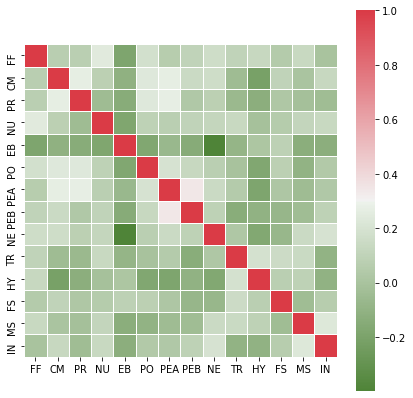

In [67]:
plt.figure(figsize=(7,7))
sns.heatmap(pwcorr_x3,linewidths=.5, cmap=sns.diverging_palette(120,10, as_cmap=True), square=True);

In [68]:
corr_y_x3 = prep_df[y_x3].corr()[['y_rent_second']]
# Низкая корреляция с игреком:
low_corr_rent_second = (corr_y_x3['y_rent_second'][abs(corr_y_x3['y_rent_second']) < 0.1]).index.to_list()
low_corr_rent_second

['TR', 'FS', 'MS']